# Lab03: Linear Regression.

- Student ID: 20120454
- Student name: Lê Công Đắt

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Rename your notebook with `ID.ipynb` (for example, if your ID is 1234567, rename your notebook with `1234567.ipynb`) and submit it on moodle.

**Contents:**

- Linear Regression.

### 1. The hypothesis set

- Linear regression is a **linear** model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).
- Generally, a linear model will make predictions by calculating a weighted sum of the input features (independent variables). 
$$ \hat{y}=w_0+w_1x_1+w_2x_2+...+w_nx_n $$
    - $\hat{y}$ is the predicted value.
    - $n$ is the number of features.
    - $x_i$ is the $i^{th}$ feature value.
    - $w_j$ is the $j^{th}$ model parameter (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n)$.
$$\hat{y}=h_{\mathbf{w}}\left(\mathbf{x}\right)=\mathbf{w}^{T}\cdot\mathbf{x}$$
    - $\mathbf{w}$ is the model **parameter vector** (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n$).
    - $\mathbf{w}^T$ is a transpose  of $\mathbf{w}$ (a row vector insteade of column vector).
    - $\mathbf{x}$ is the instance's **feature vector**, *containing* $x_0$ to $x_n$, with $x_0$ *always equal to* 1.
    - $\mathbf{w}^{T}\cdot\mathbf{x}$ is the dot product of $\mathbf{w}^T$ and $\mathbf{x}$.
    - $h_{\mathbf{w}}$ is the hypothesis function, using the parameters $\mathbf{w}$.
![Bias](Bias.png)

### 2. Performance measure and the learning goal

- Before we start to train the model, we need to determine how good the model fits the training data. There are a couple of ways to determine the level of quality, but we are going to use the most popular one and that is the **MSE** (Mean Square Error). We need to find the value for $\mathbf{w}$ that will minimize the MSE:
$$\mathbf{w}=\arg\min MSE_{\mathcal{D}_{train}}$$


- MSE on the train set $\mathcal{D}_{train}$ denoted as $\left(\mathbf{X},\mathbf{y}\right)$ including m samples $\left\{\left(\mathbf{x}_1,y_1\right),\left(\mathbf{x}_2,y_2\right),...\left(\mathbf{x}_m,y_m\right)\right\}$

$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\sum_{i=1}^{m}\left(\mathbf{w}^T\cdot\mathbf{x}_i - y_i\right )^2$$
$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\Vert\mathbf{X}\mathbf{w}-\mathbf{y}\Vert^2$$

Example below is a plot of an MSE function where the true target value is 100, and the predicted values range between -10,000 to 10,000. The MSE loss (Y-axis) reaches its minimum value at prediction (X-axis) = 100. The range is 0 to ∞.
![Plot of MSE Loss (Y-axis) vs. Predictions (X-axis)](MSE.png)

- To find the value of $\mathbf{w}$ that minimizes the MSE cost function, the most common way (*we have known since high school*) is to solve the derivative (gradient) equation. 
$$\mathbf{\hat{w}}=\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}  \mathbf{X}^T  \mathbf{y}$$
  - $\mathbf{\hat{w}}$ is the value of $\mathbf{w}$ that minimizes the cost function
  - **Notice that** $\mathbf{X}^T  \mathbf{X}$ is not always invertible. $\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}$ is pseudo-inverse of $\left(\mathbf{X}^T \mathbf{X}\right)$ - a general case of inverse when the matrix is not invertible or not even square.

### 3. Implementation 

#### Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.datasets as datasets
%matplotlib inline

#### Create data

In [2]:
X,y=datasets.make_regression(n_samples=100,n_features=1, noise=5)

#### Load and visualize data

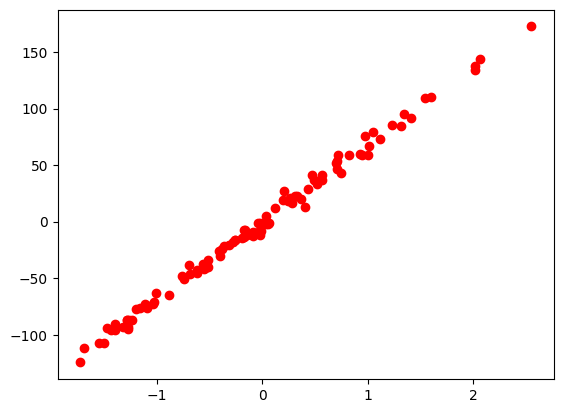

In [3]:
# Visualize data 

plt.plot(X, y, 'ro')
plt.show()


**TODO:** 

- Your observation about data:

#### Training function

In [4]:
def train_linear_regression(X, y):
    '''
    Trains Linear Regression on the dataset (X, y).
    
    Parameters
    ----------
    X : numpy array, shape (m, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    y : numpy array, shape (m, 1)
        The vector of outputs.
    
    Returns
    -------
    w : numpy array, shape (d + 1, 1)
        The vector of parameters of Linear Regression after training.
    '''
    # TODO
    '''
    𝐰̂ =(𝐗𝑇𝐗)†𝐗𝑇𝐲
    numpy.ndarray.T: Return the transposed array
    numpy.ndarray.dot(b, out=None): Dot product of two arrays
    numpy.linalg.pinv: Compute the (Moore-Penrose) pseudo-inverse of a matrix
    '''
    w=np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    
    return w

In [5]:
# Construct one_added_X 
# TODO:
# First column of one_added_X is all ones (corresponding to x_0).
'''
 numpy.ones(shape, dtype=None, order='C', *, like=None): 
     Return a new array of given shape and type, filled with ones
 numpy.ndarray.shape: Tuple of array dimensions
     For a 1D array, the shape would be (n,) where n is the number of elements in array
 numpy.concatenate((arr1, arr2, …), axis=0, out=None): Join a sequence of arrays along an existing axis
 numpy.newaxis: increase the dimension of the existing array by one more dimension
'''
one_added_X=np.concatenate((np.ones(X.shape[0])[:, np.newaxis], X), axis=1)

print ('one_added_X.shape =', one_added_X.shape)
print ('y.shape =', y.shape)


one_added_X.shape = (100, 2)
y.shape = (100,)


#### Train our model and visualize result

(-1.9398346328997542, 2.766754100372931)

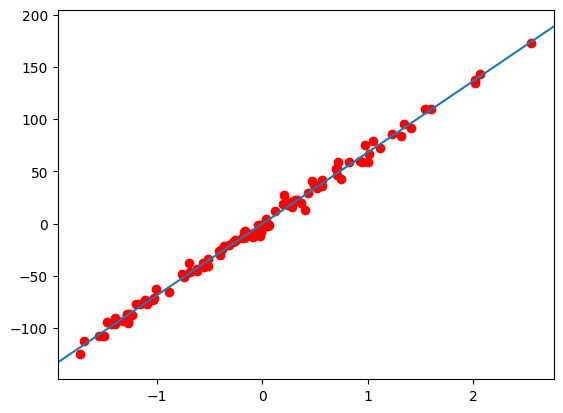

In [6]:
w = train_linear_regression(one_added_X, y)

# Visualize result
predicted_ys = one_added_X.dot(w)

plt.plot(X,y,'ro')

x_min, x_max = plt.xlim()
xs = np.array([x_min, x_max]).reshape(-1, 1)

# Construct one_added_xs 
# TODO:
# First column of one_added_xs is all ones (corresponding to x_0).
'''
Same as Construct one_added_X
'''
ones_added_xs=np.concatenate((np.ones(xs.shape[0])[:, np.newaxis], xs), axis=1)


predicted_ys = ones_added_xs.dot(w)
plt.plot(xs, predicted_ys)
plt.xlim(x_min, x_max)




- **TODO**: Discuss about advantages and disadvantages of `Linear Regression`:

##### Advantages:

- Linear regression performs exceptionally well for linearly separable data. Linear regression fits linearly seperable datasets almost perfectly and is often used to find the nature of the relationship between variables.
- Easy to implement, interpret and efficient to train:
    - Linear Regression is a very simple algorithm that can be implemented very easily to give satisfactory results. 
    - Furthermore, these models can be trained easily and efficiently even on systems with relatively low computational power when compared to other complex algorithms.
    - Linear regression has a considerably lower time complexity when compared to some of the other machine learning algorithms.
    - The mathematical equations of Linear regression are also fairly easy to understand and interpret.
    - Hence Linear regression is very easy to master. 
- It handles overfitting pretty well using dimensionally reduction techniques, regularization, and cross-validation:
    - Overfitting is a situation that arises when a machine learning model fits a dataset very closely and hence captures the noisy data as well.
- One more advantage is the extrapolation beyond a specific data set

##### Disadvantages:

- The assumption of linearity between dependent and independent variables:
    - In the real world, the data is rarely linearly separable. It assumes that there is a straight-line relationship between the dependent and independent variables which is incorrect many times.
    - Very often the inputs aren't independent of each other and hence any multicollinearity must be removed before applying linear regression
- It is prone to multicollinearity:
    - Before applying Linear regression, multicollinearity should be removed (using dimensionality reduction techniques) because it assumes that there is no relationship among independent variables.
- It is often quite prone to noise and overfitting:
    - If the number of observations are lesser than the number of features, Linear Regression should not be used, otherwise it may lead to overfit because it starts considering noise in this scenario while building the model.
- Prone to underfitting:
    - Underfitting : A sitiuation that arises when a machine learning model fails to capture the data properly.This typically occurs when the hypothesis function cannot fit the data well.
    - Since linear regression assumes a linear relationship between the input and output varaibles, it fails to fit complex datasets properly. In most real life scenarios the relationship between the variables of the dataset isn't linear and hence a straight line doesn't fit the data properly. In such situations a more complex function can capture the data more effectively.Because of this most linear regression models have low accuracy.
- Linear regression is quite sensitive to outliers:
    - Outliers of a data set are anomalies or extreme values that deviate from the other data points of the distribution.Data outliers can damage the performance of a machine learning model drastically and can often lead to models with low accuracy.
    - Outliers can have a very big impact on linear regression's performance and hence they must be dealt with appropriately before linear regression is applied on the dataset.

##### Conclusion:

- Linear Regression is a great tool to analyze the relationships among the variables but it isn’t recommended for most practical applications because it over-simplifies real-world problems by assuming a linear relationship among the variables.
- Suitable Usages:
    - To conduct a simple linear regression, one has to make certain assumptions about the data. This is because it is a parametric test. The assumptions used while performing a simple linear regression are as follows:
    - Homogeneity of variance (homoscedasticity) - One of the main predictions in a simple linear regression method is that the size of the error stays constant. This simply means that in the value of the independent variable, the error size never changes significantly.
    - Independence of observations - All the relationships between the observations are transparent, which means that nothing is hidden, and only valid sampling methods are used during the collection of data.
    - Normality - There is a normal rate of flow in the data.
    - If a data follows the above criterion then Linear regression is suitable to be used
- Linear Regression Use Cases:
    - Sales Forecasting
    - Risk Analysis
    - Housing Applications To Predict the prices and other factors
    - Finance Applications To Predict Stock prices, investment evaluation, etc.

##### References:

- Advantages and Disadvantages of Linear Regression: https://iq.opengenus.org/advantages-and-disadvantages-of-linear-regression/
- Linear Regression for Machine Learning | Intro to ML Algorithms: https://www.edureka.co/blog/linear-regression-for-machine-learning/
- ML – Advantages and Disadvantages of Linear Regression: https://www.geeksforgeeks.org/ml-advantages-and-disadvantages-of-linear-regression/
- ML Algorithms — Pros & Cons and Suitable Usages: https://medium.ninja/analytics-vidhya/ml-algorithms-pros-cons-and-suitable-usages-b377c3c09f1b